# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [96]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.exposure import histogram
import numpy as np
from skimage.transform import resize
from scipy.ndimage import convolve

In [97]:
def show_details(image):
    """
    auxiliar function that shows us the details of the image
        image: the image we want to see its details
    """
    print('Shape:',image.shape)
    print('Data type:',image.dtype)
    print('Max:',image.max())
    print('Min:', image.min())
    print('Size:',image.size)

In [98]:
def show_img(image,titol):
    """
    auxiliar function that plot an image with the corresponding title
    """
    plt.imshow(image, cmap='gray')
    plt.title(titol)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [99]:
def plot_images(images,titles):
    """
    function that shows the images on the same canvas with their corresponding titles
        images: list of images we want to plot together
        titles: list of corresponding titles of the images
    """
    canvas, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(12,12))
    
    for index,image in enumerate(images):
        ax = axs[index]
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(titles[index])

In [100]:
def plot_details(images,titles):
    """
    show the details of a set of image 
    """
    for index,image in enumerate(images):
        print()
        print('Details of ',titles[index])
        show_details(image)

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.


Details of  RGB Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432

Details of  Red channel Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432

Details of  Green channel Rocki
Shape: (1024, 768)
Data type: float64
Max: 1.0
Min: 0.0
Size: 786432


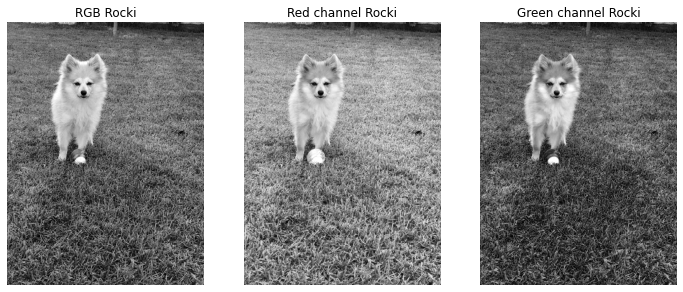

In [101]:
# load image
img21 = io.imread('images_notebook/rocki.jpeg')

# plot image
img21 = img_as_float(img21)

# we separate the channels into 3 images
rockiRed, rockiGreen, rockiBlue = img21[:,:,0],img21[:,:,1],img21[:,:,2]

# plot images
images = [rockiRed, rockiGreen, rockiBlue]
titles = ['RGB Rocki','Red channel Rocki','Green channel Rocki','Blue channel Rocki']
plot_images(images,titles)
plot_details(images,titles)

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

In [102]:
'''
APUNTS DE CLASSE:
    #your solution
    #escribir funcion a le damos un numero de pins q genrer histogrma, y nos dibuje estos histogramas ,
    #el amarillo tranfo
    #canal verde y zacul el mismo color
    #fuerzan q el 252 
    #pasar 8 bits a format flota
'''

'\nAPUNTS DE CLASSE:\n    #your solution\n    #escribir funcion a le damos un numero de pins q genrer histogrma, y nos dibuje estos histogramas ,\n    #el amarillo tranfo\n    #canal verde y zacul el mismo color\n    #fuerzan q el 252 \n    #pasar 8 bits a format flota\n'

In [103]:
def im_hist(im, nbins = 8):
    """
    function that plot the histogram of RGB and grayscale images with the correponding number of bins
        im: orginal image
        nbins: the number of bins we want to plot with, by default it will be 8
    """
    # convert im to grayscale image
    imGray = rgb2gray(im)
    # we get the images separated by channels
    imRed = im[:,:,0]
    imGreen = im[:,:,1]
    imBlue = im[:,:,2]
    
    # histogram function returns two arrays:
    # 1. array that represnts the values of the histogram
    # 2. array with the values at the center of the bins
    hstGray, bins_im = histogram(imGray,nbins)
    hstRed, bins_red = histogram(imRed,nbins)
    hstGreen, bins_green =  histogram(imGreen,nbins)
    hstBlue, bins_blue =  histogram(imBlue,nbins)
    
    # get the x cordinates of the bar list we should use
    ind = np.arange(nbins)
    
    # place bars containers of the corresponding images on the axes
    canvas, axs = plt.subplots(ncols = 1, figsize = (18, 7))
    axs.bar(ind,hstGray,0.1,color='gray')
    axs.bar(ind+0.1,hstRed,0.1,color='r')
    axs.bar(ind+0.2,hstGreen,0.1,color='g')
    axs.bar(ind+0.3,hstBlue,0.1,color='b')
    
    # place a legend on the axes
    axs.legend(['Gray','Red','Green','Blue'],loc=1, prop={'size': 10})
    
    # set title on the axes
    axs.set_title('Histogram with ' + str(nbins) + ' nbins')
    
    # plot the figure
    plt.show()
    

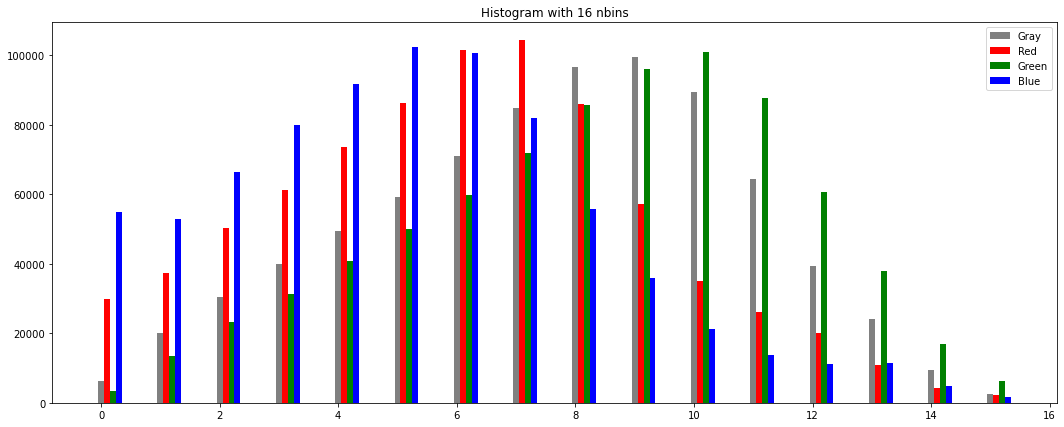

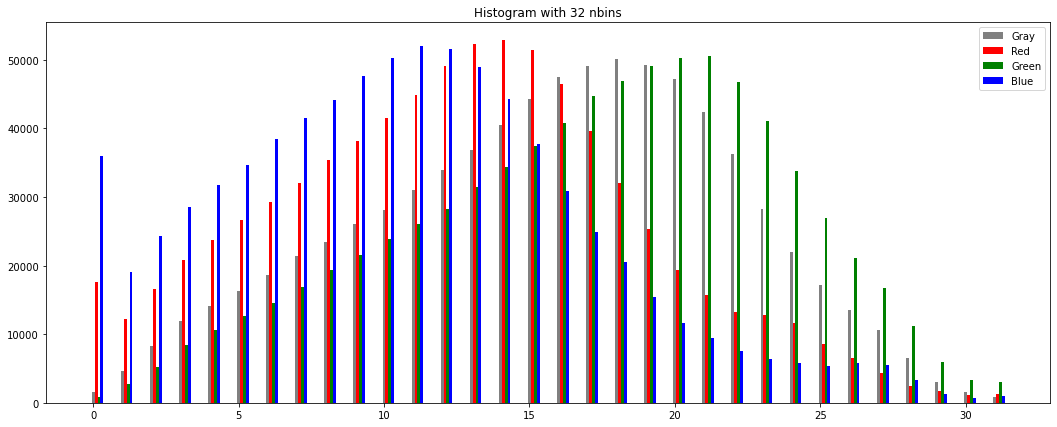

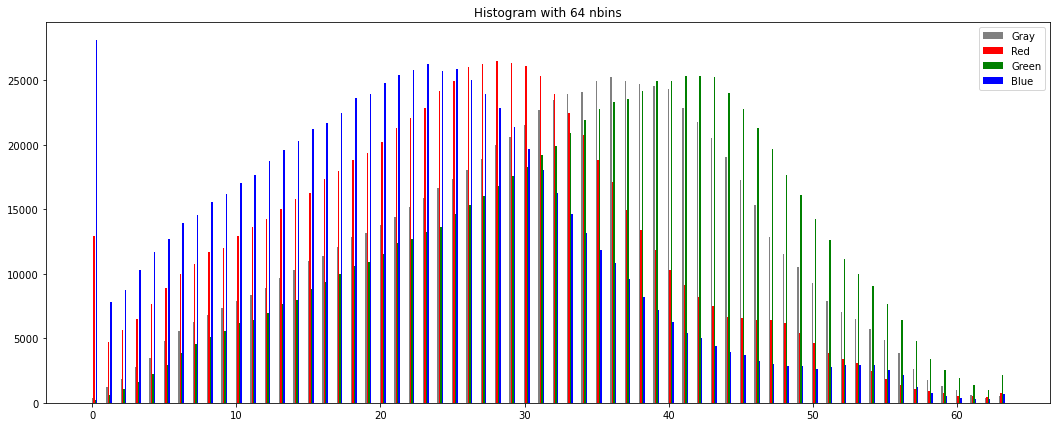

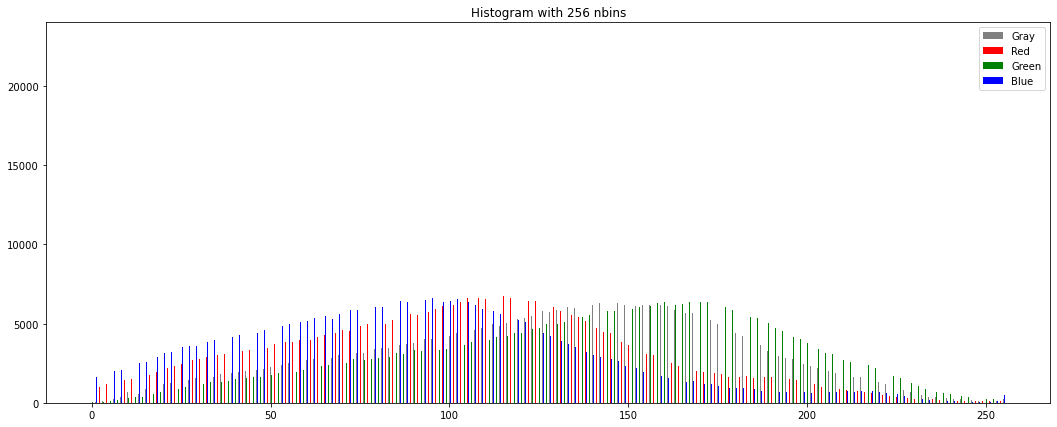

In [104]:
set_bins = [16,32,64,256]

# plot the images with the requested bins
for index,bins in enumerate(set_bins):
    im_hist(img21,bins)

Questions:
    
   **1.What is the histogram representing for an image?** 
    
   The histogram of the image is the graphic representation of the number of pixels in an image according to its intensity, that is, a grouping of pixels according to the values that the pixels can take.


   **2.What are the bins representing?**
   
   These values can be grouped in sets for example of 4, of 16, of 32, of 256.. Therefore in bins of 4, of 16, of 32, of 256, each bin representing a certain intensity value range.
    
   **3.What type should be the image in order to compute the histogram?**
    
   We have converted the previous images to float64 format in order to compute the histogram.

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [105]:
'''
APUNTS DE CLASSE:
    #your solution
    #tranformar a¡color a escala grises
    #.smdm tamaño? reducir tamaño 256 x 256 
    #generamos sun a mascara horizontal, vector de 1, y haceos una convolucion
    #uando aplicamos filros, las mascara stienes q estar nrmalizadas
    #2.tranponemos, mas vertical y convolu
    #3,mas 2D 15x 15 y aplicamos convolu

    #ver max y min 
    #si float ->conv -> no 
'''

'\nAPUNTS DE CLASSE:\n    #your solution\n    #tranformar a¡color a escala grises\n    #.smdm tamaño? reducir tamaño 256 x 256 \n    #generamos sun a mascara horizontal, vector de 1, y haceos una convolucion\n    #uando aplicamos filros, las mascara stienes q estar nrmalizadas\n    #2.tranponemos, mas vertical y convolu\n    #3,mas 2D 15x 15 y aplicamos convolu\n\n    #ver max y min \n    #si float ->conv -> no \n'

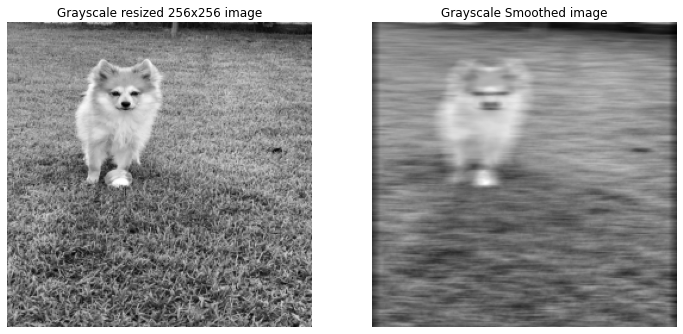

In [106]:
# convert rgb to grayscale image
rocki_gray = rgb2gray(img21)

# Reshape image to 256x256
rocki_gray = resize(rocki_gray,(256,256))

#print(rocki_gray.dtype)
# Define mask
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
mask_h1d = mask_h1d/np.sum(mask_h1d)

# We convolve the image using the mask
rocki_gray_smooth_h1d = convolve(rocki_gray, mask_h1d, mode='constant', cval=0.0)

images = [rocki_gray,rocki_gray_smooth_h1d]
titles = ['Grayscale resized 256x256 image','Grayscale Smoothed image']
plot_images(images,titles)

Questions:
    
   **1.Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image?**
   
   Tsdgdfbhgfjnhghmjh,


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


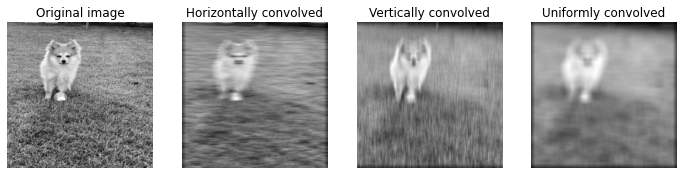

In [107]:
# Define the vertically convolution mask
mask_v1d = [[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]
mask_v1d = mask_v1d/np.sum(mask_v1d)

# We convolve the image using this mask
rocki_gray_smooth_v1d = convolve(rocki_gray, mask_v1d, mode='constant', cval=0.0)

# Define the vertically convolution mask
mask_u1d = np.ones((15,15))
mask_u1d = mask_u1d/np.sum(mask_u1d)

# We convolve the image using this mask
rocki_gray_smooth_u1d = convolve(rocki_gray, mask_u1d, mode='constant', cval=0.0)

images = [rocki_gray,rocki_gray_smooth_h1d,rocki_gray_smooth_v1d,rocki_gray_smooth_u1d]
titles = ['Original image','Horizontally convolved','Vertically convolved','Uniformly convolved']
plot_images(images,titles)

c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


In [108]:
'''
APUNTS DE CLASSE:
    #your solution
    #conv -> color
    #conv con filtro 2D en los 3 canales
    #tiene que ser RGB 
    #256 
'''

'\nAPUNTS DE CLASSE:\n    #your solution\n    #conv -> color\n    #conv con filtro 2D en los 3 canales\n    #tiene que ser RGB \n    #256 \n'

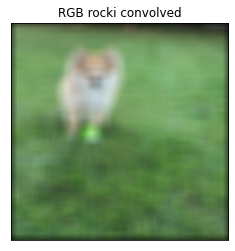

In [109]:
def conv_coor(image, mask):
    """
    function that applies a 3-channel filter
        image: image we want to convolve
        mask: mask we use for convolving
    return:
        image  convolved
    """
    mask = mask/np.sum(mask)
    # We convolve the image using the mask
    image[:,:,0] = convolve(image[:,:,0], mask, mode='constant', cval=0.0)
    image[:,:,1] = convolve(image[:,:,1], mask, mode='constant', cval=0.0)
    image[:,:,2] = convolve(image[:,:,2], mask, mode='constant', cval=0.0)
    return image

# Now we apply to our image
rocki2 = resize(img21,(256,256))
rocki_convolved = conv_coor(rocki2, np.ones((15,15)))

show_img(rocki_convolved,'RGB rocki convolved')

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


In [12]:
#your solution

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

In [13]:
#your solution

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

In [14]:
#your solution
#filtros no lineales, aplicar kernel gausiano, 
#probar un valor mayor q 1 y menor

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [15]:
#your solution

#filtro de mediano

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [28]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""

# filtros de sobel...dnnoseq
#con cual detecta mejor los conornos

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

In [22]:
#your solution


c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [23]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

(1000, 1500, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


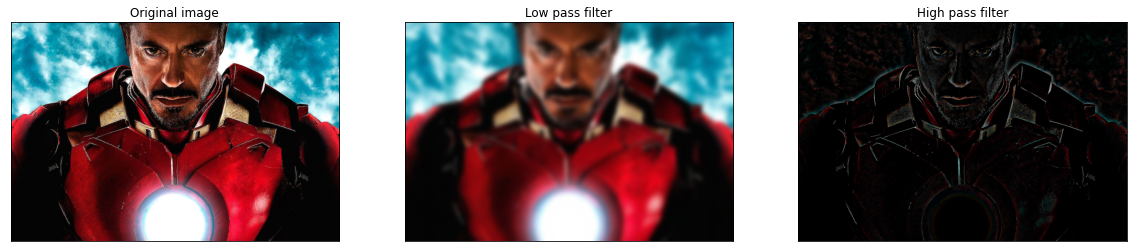

In [24]:
#your solution
#aplicamos un filtro, paso abajjo y paso alto
#aplicamos filtro gausiano, 
#hacemos baso abajo
#le restamos el


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(575, 728, 3)


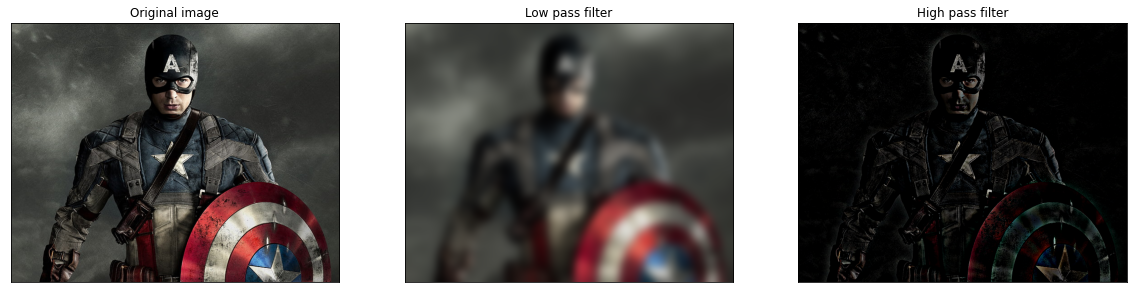

In [25]:
#your solution
#


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


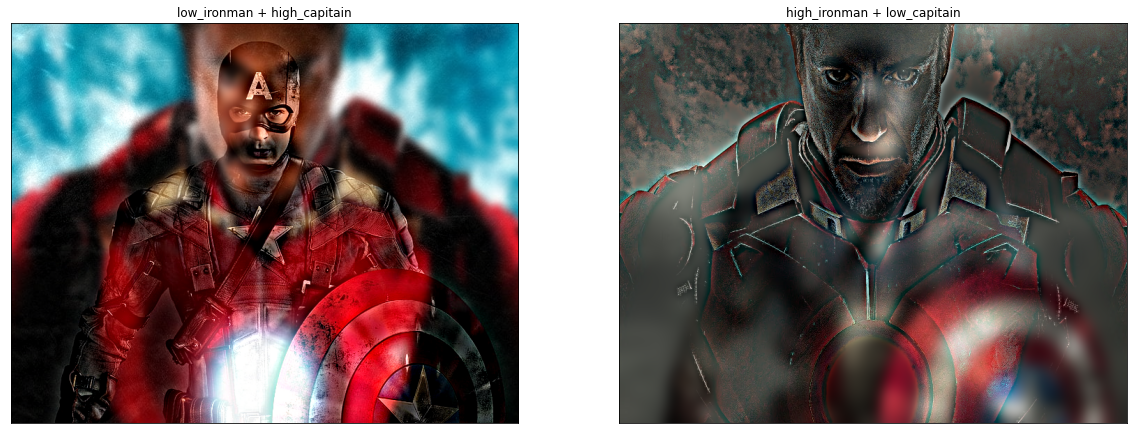

In [26]:
#your solution
#juntar el filtro .. 

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


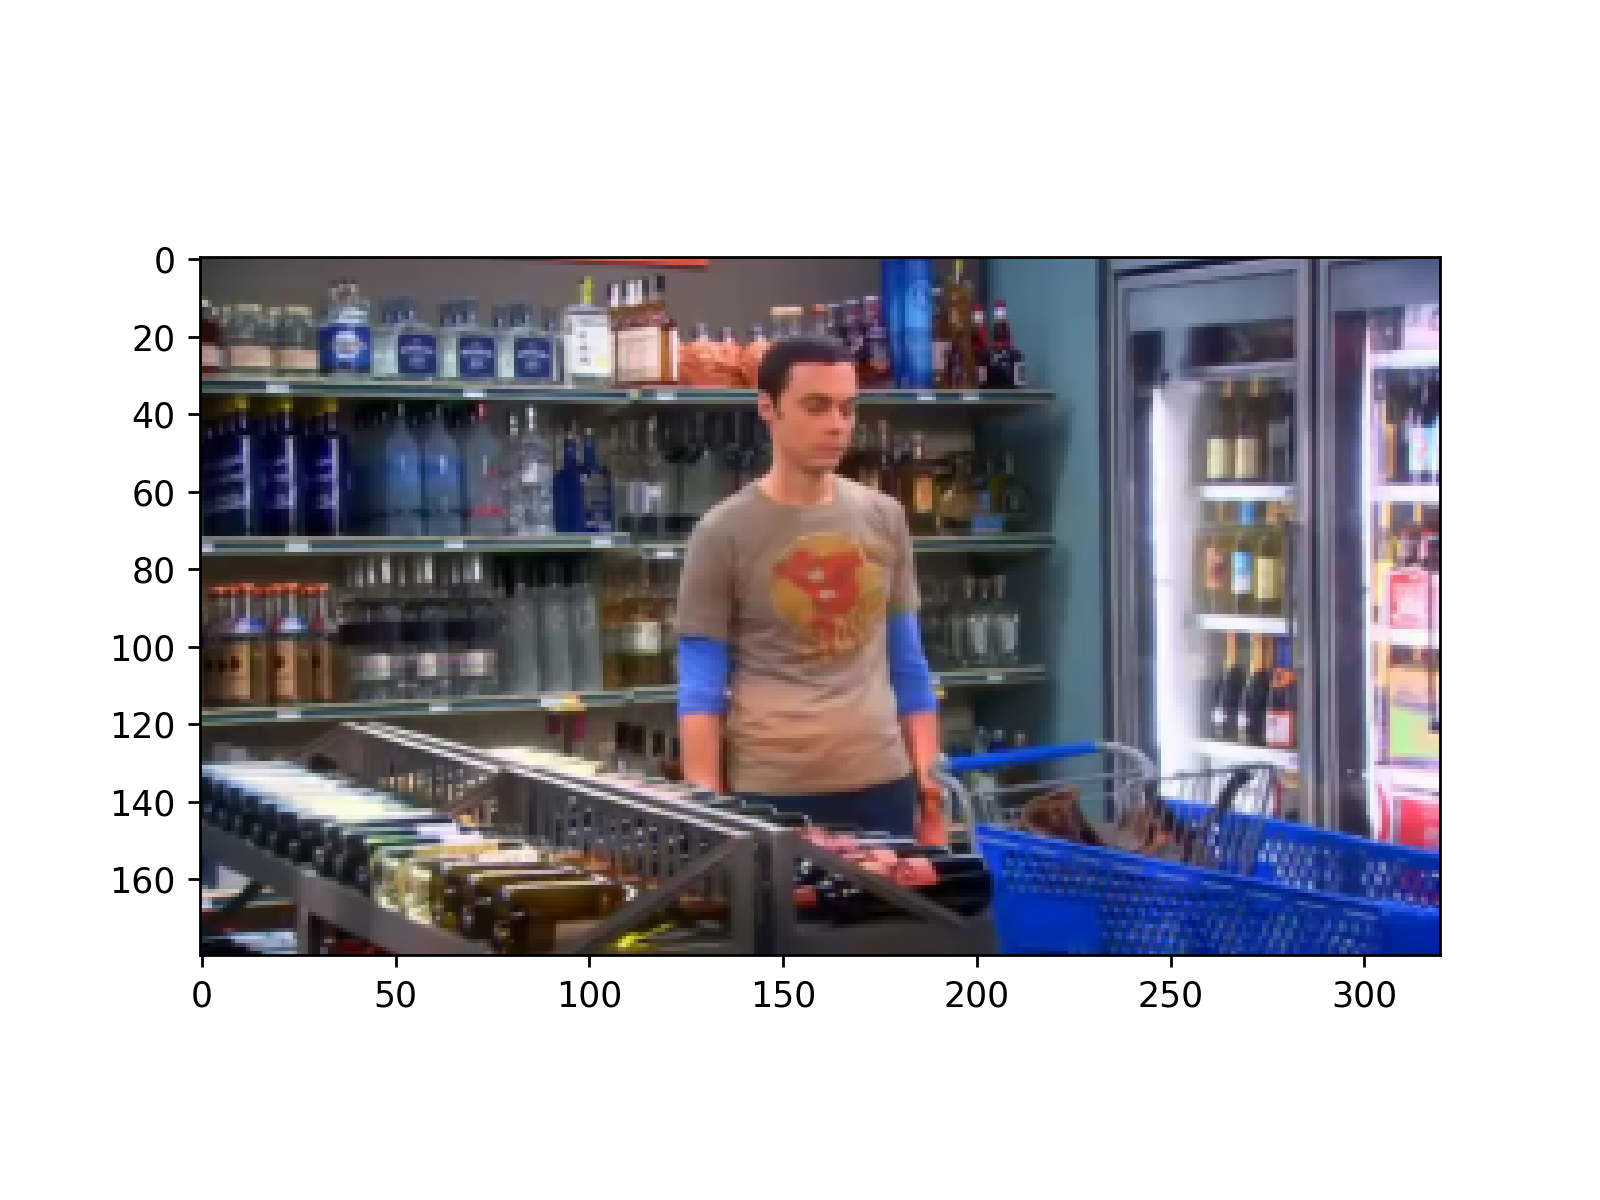

In [33]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


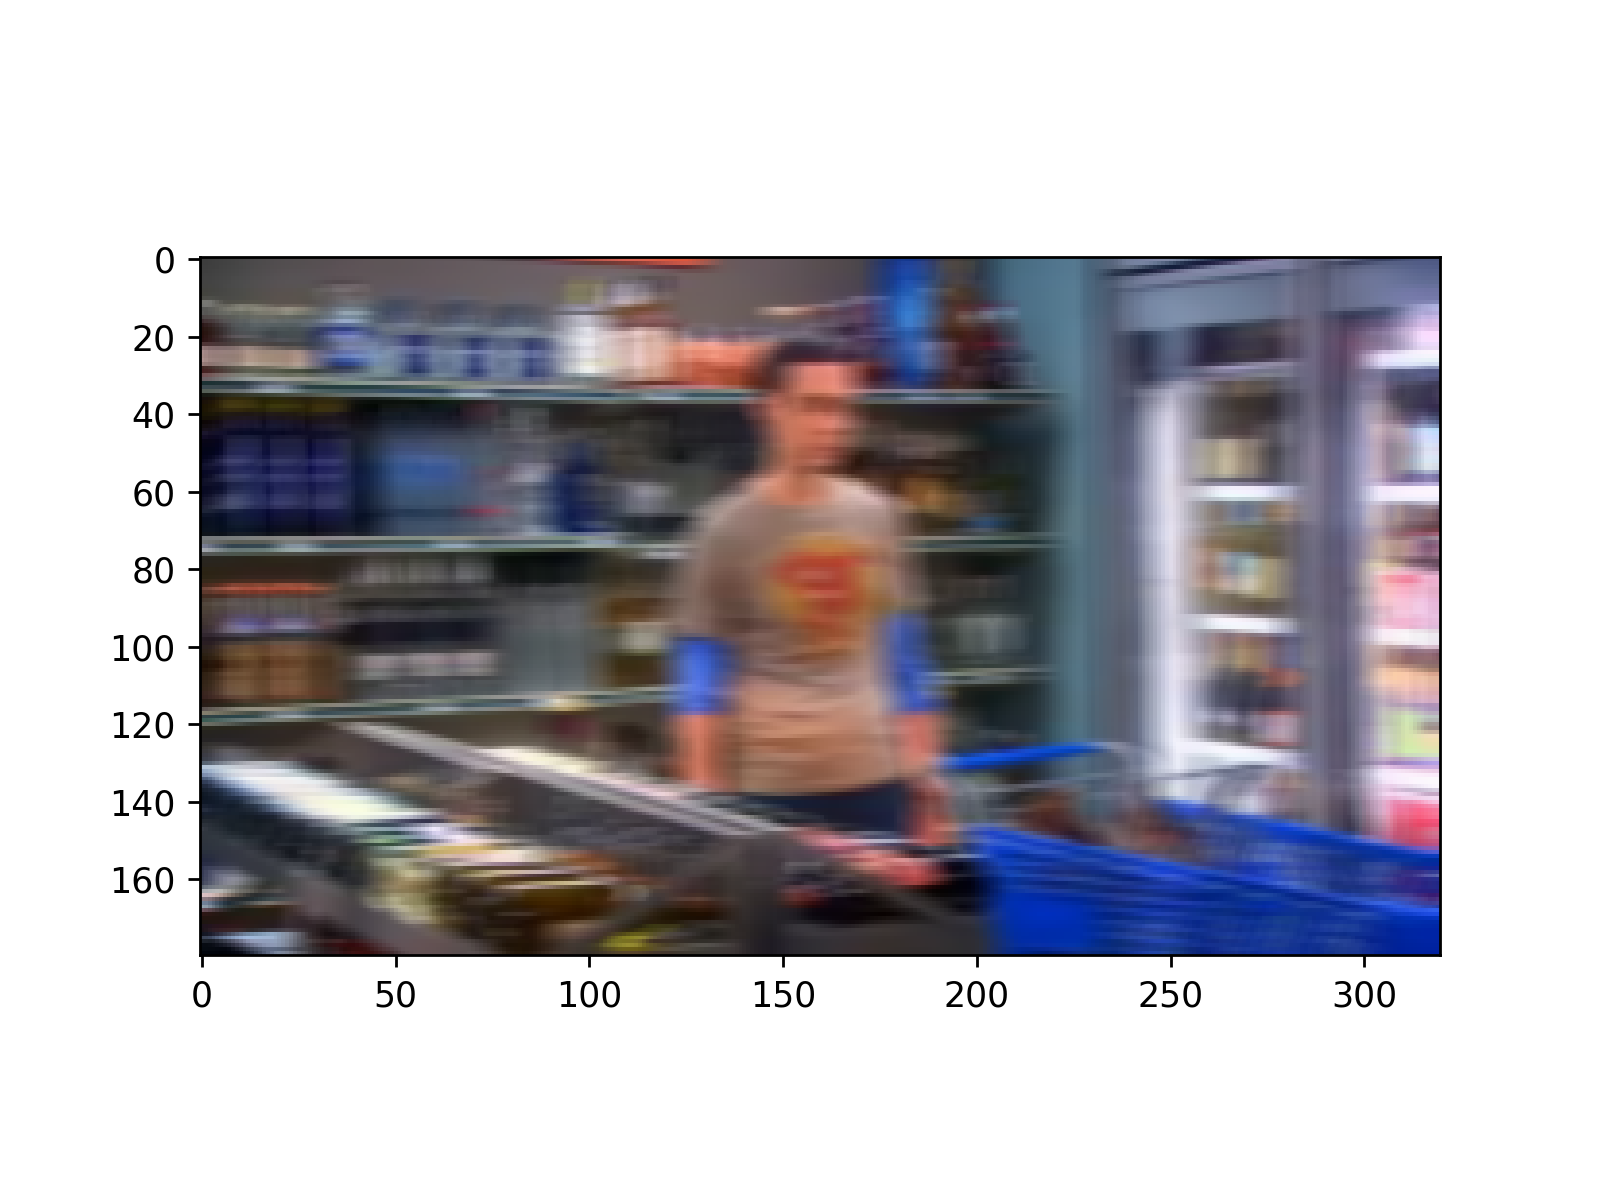

In [30]:
#como visualizar un viedeo, 
#cargaremos imagen por imagen, y podremos
#anominizar, 

In [ ]:
import warnings
warnings.filterwarnings("ignore")